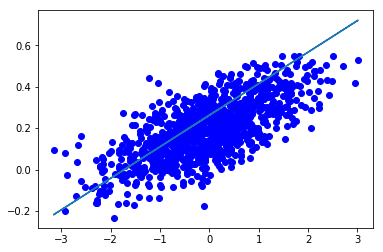

step: 0, w1: [ 0.14667886], b: [ 0.25586638], loss: 0.0158365


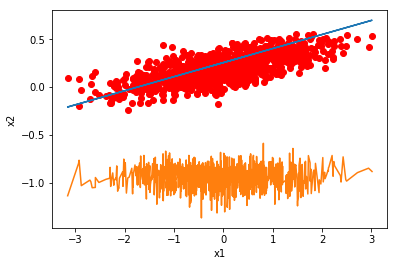

step: 1, w1: [ 0.1418374], b: [ 0.25033045], loss: 0.014807


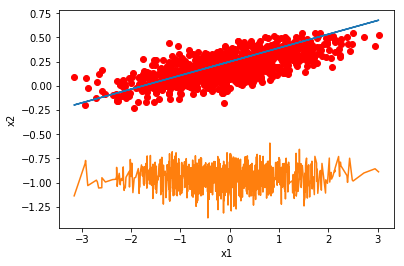

step: 2, w1: [ 0.13746756], b: [ 0.24532507], loss: 0.0139666


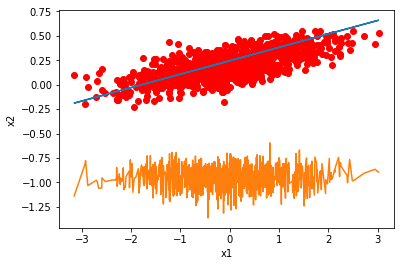

step: 3, w1: [ 0.13352337], b: [ 0.24079943], loss: 0.0132806


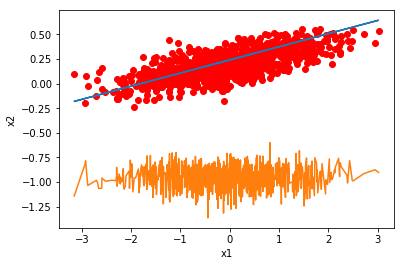

step: 4, w1: [ 0.12996334], b: [ 0.23670755], loss: 0.0127207


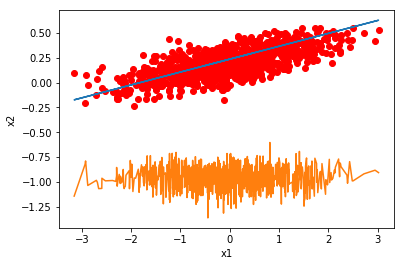

step: 5, w1: [ 0.12674999], b: [ 0.23300792], loss: 0.0122636


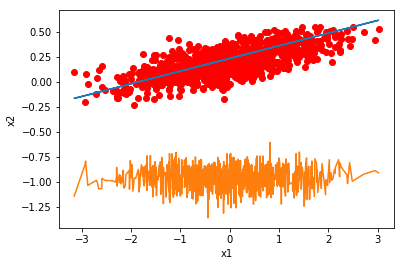

step: 6, w1: [ 0.12384956], b: [ 0.22966295], loss: 0.0118905


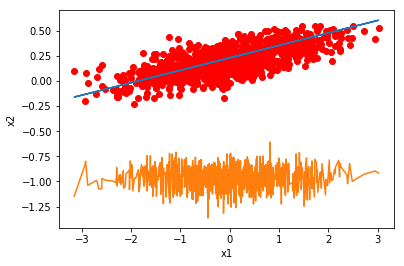

step: 7, w1: [ 0.12123153], b: [ 0.22663866], loss: 0.0115859


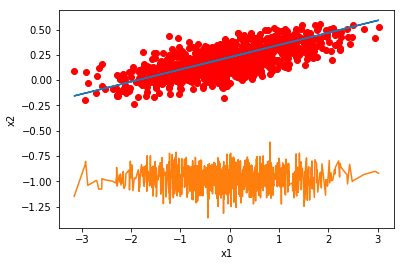

step: 8, w1: [ 0.11886839], b: [ 0.22390433], loss: 0.0113373


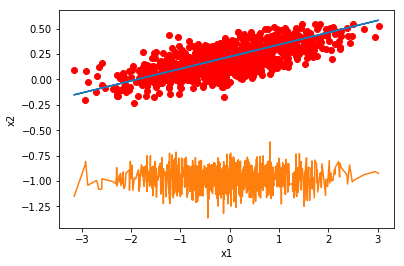

step: 9, w1: [ 0.1167353], b: [ 0.22143218], loss: 0.0111343


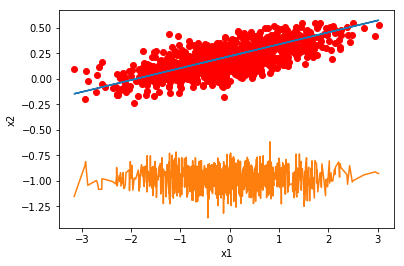

step: 10, w1: [ 0.11480985], b: [ 0.21919709], loss: 0.0109687


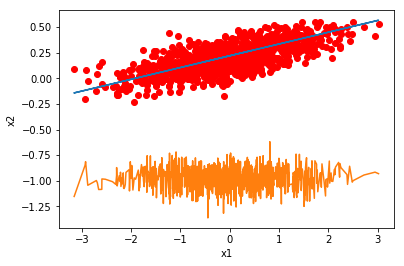

step: 11, w1: [ 0.11307181], b: [ 0.21717635], loss: 0.0108335


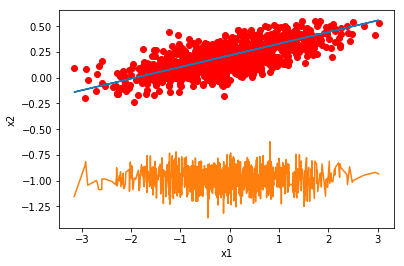

step: 12, w1: [ 0.11150292], b: [ 0.21534939], loss: 0.0107231


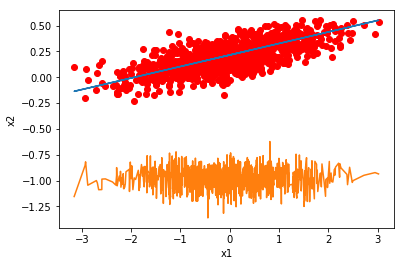

step: 13, w1: [ 0.1100867], b: [ 0.21369766], loss: 0.010633


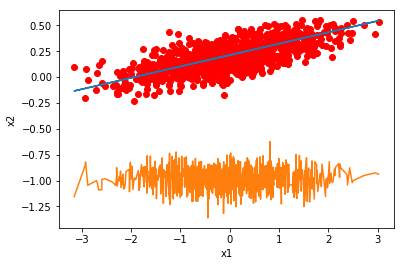

step: 14, w1: [ 0.10880829], b: [ 0.21220435], loss: 0.0105594


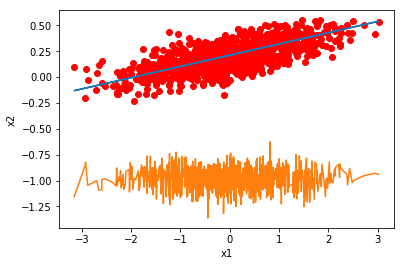

step: 15, w1: [ 0.10765427], b: [ 0.21085429], loss: 0.0104994


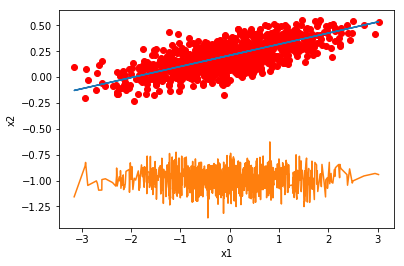

step: 16, w1: [ 0.10661253], b: [ 0.20963374], loss: 0.0104503


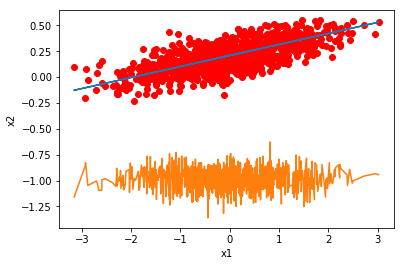

step: 17, w1: [ 0.10567211], b: [ 0.20853028], loss: 0.0104103


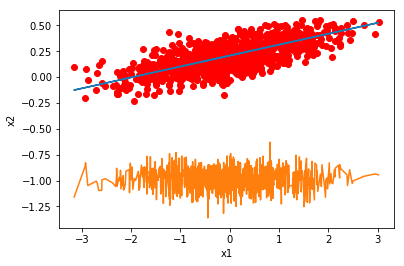

step: 18, w1: [ 0.10482318], b: [ 0.20753269], loss: 0.0103777


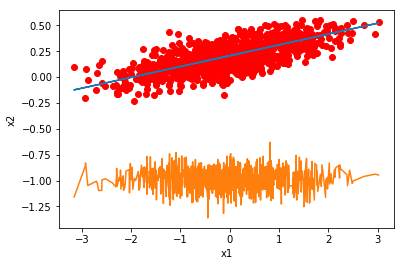

step: 19, w1: [ 0.10405682], b: [ 0.20663083], loss: 0.010351


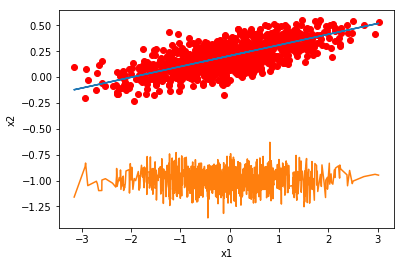

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import math,time

num_points=1000
vector=[]
for i in range(num_points):
    x1=np.random.normal(0,1)
    x2=0.1*x1+0.2+np.random.normal(0,0.1)
    vector.append([x1,x2])
    
x1_data=[v[0] for v in vector]
x2_data=[v[1] for v in vector]

W1=tf.Variable(tf.random_uniform([1],0,0.2))
b=tf.Variable(tf.random_uniform([1],0,0.6))
x2=W1*x1_data+b
loss=tf.reduce_mean(tf.square(x2-x2_data))
optimizer=tf.train.GradientDescentOptimizer(0.05)
train=optimizer.minimize(loss)

init=tf.global_variables_initializer()
sess=tf.Session()
sess.run(init)

x1_data_sorted=sorted(x1_data)

plt.plot(x1_data,x2_data,'bo')
plt.plot(x1_data,sess.run(W1)*x1_data+sess.run(b))
plt.show()

iteration=20
for step in range(iteration):
    sess.run(train)
    print("step: %s, w1: %s, b: %s, loss: %s"%(step,sess.run(W1),sess.run(b), sess.run(loss)))
    
    plt.plot(x1_data,x2_data,'ro')
    plt.plot(x1_data,sess.run(W1)*x1_data+sess.run(b))
    plt.plot(x1_data_sorted,sess.run(W1)*x1_data+sess.run(b)-x2_data-1)
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.legend()
    plt.show()
    time.sleep(1)